In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Data Preprocessing:

Load the provided dataset and perform initial data exploration.

Handle missing data and outliers.

Prepare the data for machine learning by encoding categorical variables and splitting it into
training and testing sets.

In [107]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx",sheet_name='Sheet1')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [108]:
df.shape

(100000, 9)

In [109]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [110]:
df = df.drop(columns = ['CustomerID','Name'],axis=1)

In [111]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


<Axes: xlabel='Total_Usage_GB'>

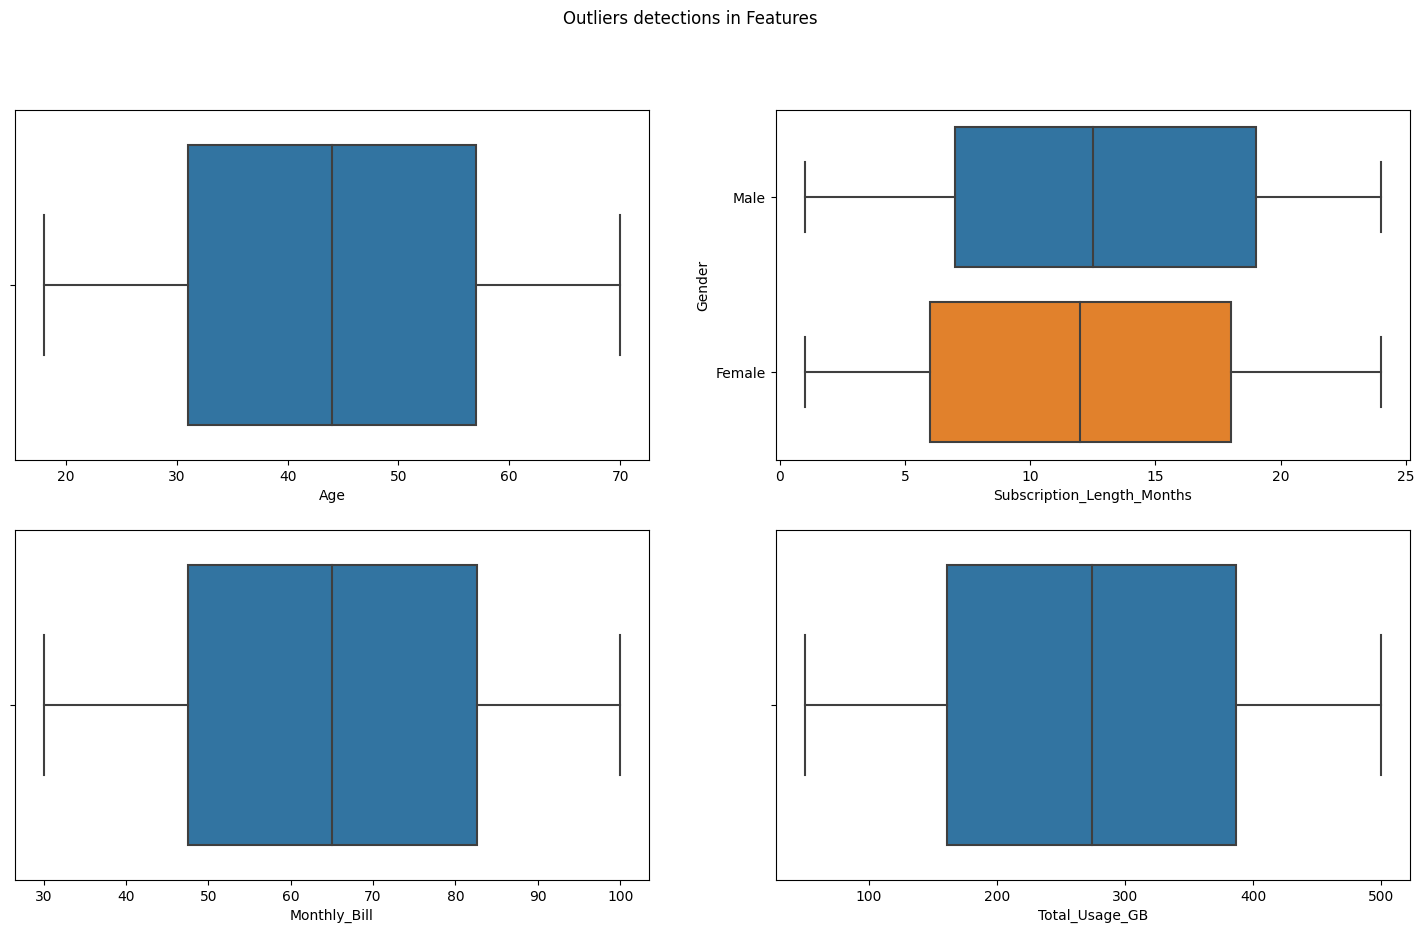

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Outliers detections in Features')

sns.boxplot(ax=axes[0, 0],data = df, x = 'Age')
sns.boxplot(ax=axes[0, 1],data = df, x = 'Subscription_Length_Months',y='Gender')
sns.boxplot(ax=axes[1, 0],data = df, x = 'Monthly_Bill')
sns.boxplot(ax=axes[1, 1],data = df, x = 'Total_Usage_GB')

In [114]:
# # Labelencoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# var_mod = df.select_dtypes(include='object').columns
# print(var_mod)
# for i in var_mod:
#     df[i] = le.fit_transform(df[i])

In [115]:
Gender = ['Male', 'Female']
Location = ['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston']

In [116]:
df['Gender'] = df.Gender.apply(lambda x:Gender.index(x))
df['Location'] = df.Location.apply(lambda x:Location.index(x))

In [117]:
df['Location'].value_counts()

4    20157
0    20041
2    20031
3    19958
1    19813
Name: Location, dtype: int64

In [118]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [119]:
df.dtypes

Age                             int64
Gender                          int64
Location                        int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [120]:
#splitting Train and Test Data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [121]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(70000, 6) (30000, 6)
(70000,) (30000,)


In [122]:
sum(y_train)

34685

**2.Feature Engineering:**

Generate relevant features from the dataset that can help improve the model's prediction accuracy.

Apply feature scaling or normalization if necessary.

In [123]:
# x_train['Total_Bill'] = x_train['Subscription_Length_Months']*x_train['Monthly_Bill']
# x_test['Total_Bill'] = x_test['Subscription_Length_Months']*x_test['Monthly_Bill']

In [124]:
# x_train = x_train.drop(['Monthly_Bill','Subscription_Length_Months'],axis=1)
# x_test = x_test.drop(['Monthly_Bill','Subscription_Length_Months'],axis=1)

In [125]:
# # from sklearn.preprocessing import MinMaxScaler
# # scaler = MinMaxScaler()
# # x_train = scaler.fit_transform(x_train)
# # x_test = scaler.transform(x_test)

# from sklearn.preprocessing import Normalizer
# Norm = Normalizer()
# x_train = Norm.fit_transform(x_train)
# x_test = Norm.transform(x_test)

**3.Model Building:**

Choose appropriate machine learning algorithms (e.g.,logistic regression, random forest, or neural networks).

Train and validate the selected model on the training dataset.

Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall,F1-score).

In [126]:
#Function to print classification report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

def metric_report(ytest,yhat):
  print("Accuracy",metrics.accuracy_score(ytest,yhat))
  print("Confusion matrix")
  print(metrics.confusion_matrix(ytest,yhat))
  print("Classification Report")
  print(metrics.classification_report(ytest,yhat))

In [127]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
ytest = classifier.predict(x_test)
metric_report(y_test,ytest)

Accuracy 0.49683333333333335
Confusion matrix
[[13227  1679]
 [13416  1678]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.89      0.64     14906
           1       0.50      0.11      0.18     15094

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.41     30000
weighted avg       0.50      0.50      0.41     30000



In [128]:
#Random Forest classifier Alogarithm
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,random_state=5)
RFC.fit(x_train,y_train)
ytest = RFC.predict(x_test)
metric_report(ytest,y_test)

Accuracy 0.4976333333333333
Confusion matrix
[[8112 8277]
 [6794 6817]]
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.49      0.52     16389
           1       0.45      0.50      0.47     13611

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [129]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1)
clf.fit(x_train, y_train)
ytest = clf.predict(x_test)
metric_report(ytest,y_test)

Accuracy 0.4968666666666667
Confusion matrix
[[14906 15094]
 [    0     0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.50      0.66     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.50     30000
   macro avg       0.50      0.25      0.33     30000
weighted avg       1.00      0.50      0.66     30000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
#XGBoost Alogarithm
from xgboost import XGBClassifier
xgbclassifier = XGBClassifier()
xgbclassifier.fit(x_train, y_train)
yhat = xgbclassifier.predict(x_test)
metric_report(y_test,yhat)

Accuracy 0.5008333333333334
Confusion matrix
[[8048 6858]
 [8117 6977]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     14906
           1       0.50      0.46      0.48     15094

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [131]:
#Decision Tree classifier Alogarithm
from sklearn.tree import DecisionTreeClassifier
de=5
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=de).fit(x_train,y_train)
#dtree.fit(xtrain,ytrain)
pt = dtree.predict(x_test)
metric_report(y_test,pt)

Accuracy 0.5021333333333333
Confusion matrix
[[10770  4136]
 [10800  4294]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.72      0.59     14906
           1       0.51      0.28      0.37     15094

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.48     30000
weighted avg       0.50      0.50      0.48     30000



**4.Model Optimization:**

Fine-tune the model parameters to improve its predictive performance.

Explore techniques like cross-validation and hyperparameter tuning.

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1, 10]
}

lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid, cv=5)

clf.fit(x_train, y_train)
print(clf.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

{'C': 0.1, 'penalty': 'l2'}


In [133]:
lr = LogisticRegression(C=0.1,penalty='l2')
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)
metric_report(y_test,yhat)

Accuracy 0.49693333333333334
Confusion matrix
[[13230  1676]
 [13416  1678]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.89      0.64     14906
           1       0.50      0.11      0.18     15094

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.41     30000
weighted avg       0.50      0.50      0.41     30000



**5.Model Deployment:**

Once satisfied with the model's performance, deploy it into a production-like environment (you can simulate this in a development environment).

Ensure the model can take new customer data as input and provide churn predictions.

#Deployed Model using streamlit in a run_streamlit.ipynb using Model_deployment_Stremlit.py

In [134]:
import pickle

filename = 'trained_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
# creating a function for Prediction

def churn_prediction(input_data):


    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = loaded_model.predict(input_data_reshaped)
    print(prediction)

    if (prediction[0] == 0):
      return 'Customer not churn'
    else:
      return 'Customer churn'

In [ ]:
# creating a function for Prediction

def churn_prediction(input_data):


    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = loaded_model.predict(input_data_reshaped)
    print(prediction)

    if (prediction[0] == 0):
      return 'Customer not churn'
    else:
      return 'Customer churn'

In [28]:
def main():


    # giving a title
    st.title('customer churn Prediction Web App')


    # getting the input data from the user


    CustomerID = st.text_input('CustomerID')
    Name = st.text_input('Name')
    Age = st.number_input('Age')
    sex = st.text_input('Gender')
    Geograph = st.text_input('Location')
    Subscription_Length_Months = st.number_input('Subscription Length Months')
    Monthly_Bill = st.number_input('Monthly Bill')
    Total_Usage_GB = st.float_input('Total Usage GB')

    sex = Gender.index(sex)
    Geograph = Location.index(Geograph)


    # code for Prediction
    churn = ''

    # creating a button for Prediction

    if st.button('churn Test Result'):
        churn = churn_prediction([Age, sex, Geograph, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB])


    st.success(churn)







In [ ]:
if __name__ == '__main__':
    main()